In [ ]:
from datasets import load_dataset
ds = load_dataset("KGraph/FB15k-237-text")

DatasetNotFoundError: Dataset 'KGraph/FB15k-237-text' doesn't exist on the Hub or cannot be accessed.

In [ ]:


import csv

from rdflib import Graph, URIRef

# 1. Criar o grafo RDF
kg = Graph()

# 2. Adicionar as triplas do dataset
for item in ds['train']:
    parts = item['text'].split()
    if len(parts) != 3:
        continue
    
    head, relation, tail = parts

    # criar URIs para cada elemento
    head_uri = URIRef(f"http://example.org/entity/{head}")
    relation_uri = URIRef(f"http://example.org/relation/{relation}")
    tail_uri = URIRef(f"http://example.org/entity/{tail}")
    
    kg.add((head_uri, relation_uri, tail_uri))

print(f"Total de triplas RDF: {len(kg)}")


Total de triplas RDF: 272115


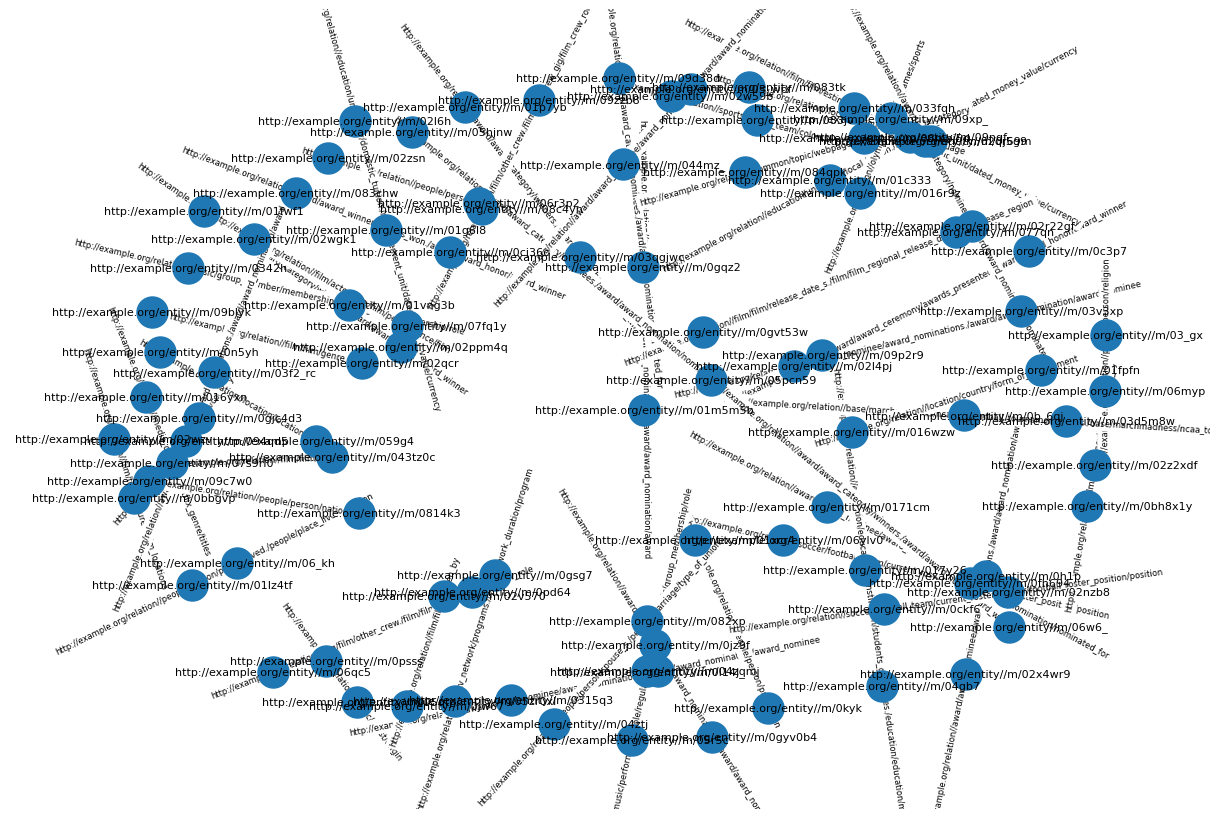

In [ ]:
import networkx as nx
subgraph = list(kg)[:50]  # 50 triplas
import matplotlib.pyplot as plt

# Converter o RDFLib Graph para NetworkX
G = nx.DiGraph()

for s, p, o in subgraph:
    G.add_edge(str(s), str(o), label=str(p))
    

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.3)
nx.draw(G, pos, with_labels=True, node_size=500, font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(s, o): p for s, o, p in G.edges(data='label')}, font_size=6)
plt.show()